In [4]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [5]:
ticker = ['PRGO', 'CNC', 'CVS', 'CI', 'UHS', 'TAP', 'SJM', 'ADM', 'TSN', 'COTY', 'PVH', 'CCL', 'MHK', 'F', 'KSS', 'XRX', 'NLOK', 'FIS', 'DXC', 'WDC', 'MRO', 'HFC', 'NOV', 'FANG', 'KMI']
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2015-1-1', end= '2020-12-31')['Adj Close']

In [6]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PRGO,CNC,CVS,CI,UHS,TAP,SJM,ADM,TSN,COTY,...,XRX,NLOK,FIS,DXC,WDC,MRO,HFC,NOV,FANG,KMI
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,0.007984,-0.011311,-0.000588,-0.000754,-0.000949,0.001761,0.007956,0.001822,0.003711,-0.031531,...,-0.008818,0.003810,0.044145,0.000437,-0.000200,-0.026787,-0.003937,-0.009584,0.009370,0.000000
2020-12-28,0.014437,0.013864,0.001617,0.016609,-0.002925,0.000220,0.002065,0.005245,-0.006348,-0.018272,...,0.030530,-0.000951,-0.003629,0.049414,0.002801,0.000000,-0.005141,0.004435,-0.012933,-0.013833
2020-12-29,-0.002242,0.003394,-0.002647,0.009306,-0.002567,0.001318,-0.008633,-0.005043,-0.013763,-0.027320,...,-0.016021,-0.009080,0.007174,-0.016765,-0.035998,-0.009091,0.001981,-0.005917,-0.013315,-0.005145
2020-12-30,-0.001572,-0.001865,-0.002212,0.000000,-0.000367,-0.006609,-0.005303,0.009259,0.001416,0.018773,...,0.010099,-0.003848,-0.012535,0.028335,0.025354,0.034409,0.031551,0.024910,0.047168,0.000000
2020-12-31,0.005381,0.018664,0.008085,0.020038,0.010014,-0.001106,0.007642,0.009968,0.013278,0.004283,...,0.013021,0.001445,0.013737,0.056314,0.111821,-0.019303,-0.008858,-0.006534,-0.017816,0.007342


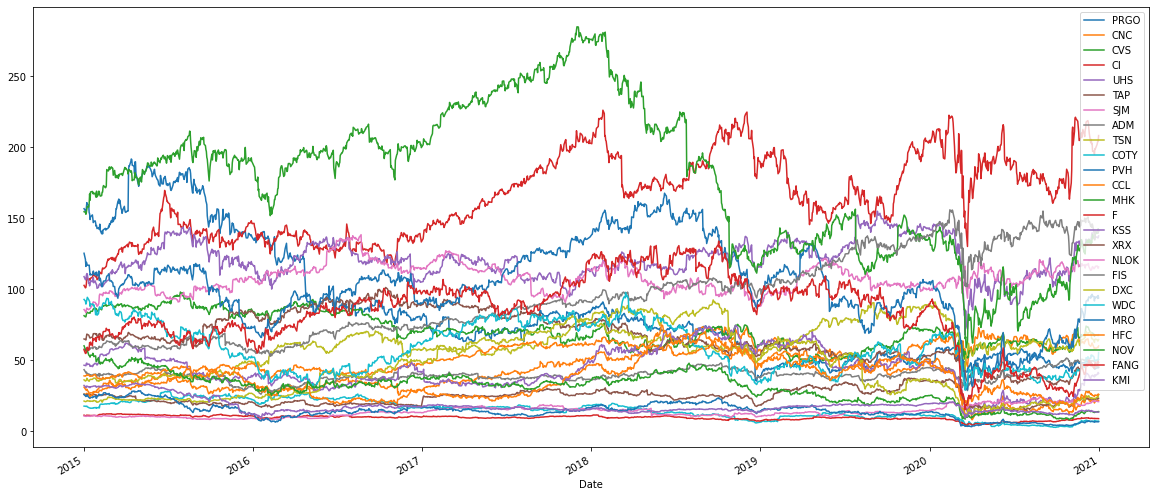

In [8]:
#Price of each stock in the last 6 years
data.plot(figsize=(20, 9));

<AxesSubplot:xlabel='Date'>

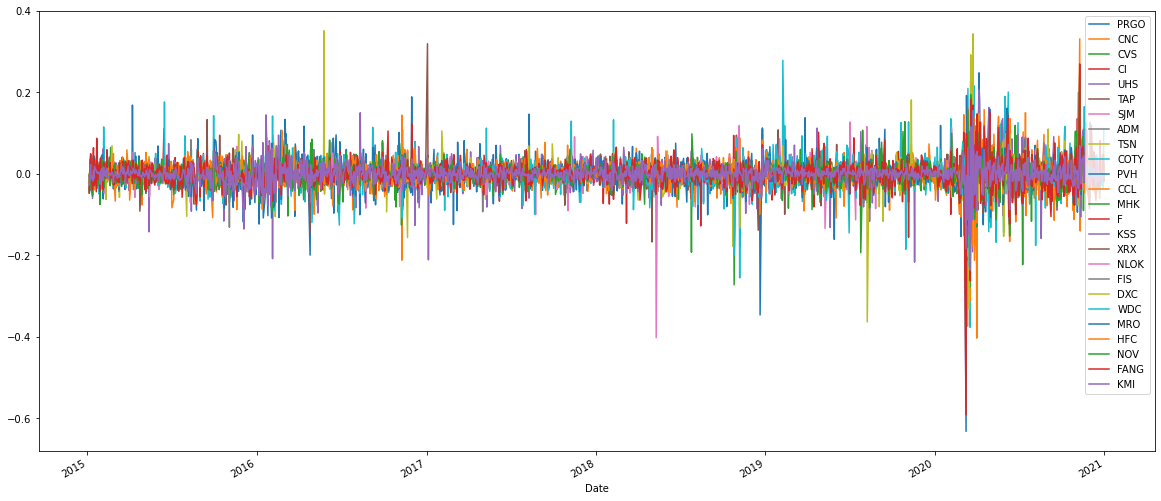

In [10]:
#picture tells us the returns are normally distributed and have a stable mean
log_returns.plot(figsize = (20, 9))

In [11]:
u = log_returns.mean()
u

PRGO   -0.000830
CNC     0.000551
CVS    -0.000120
CI      0.000468
UHS     0.000155
TAP    -0.000240
SJM     0.000199
ADM     0.000101
TSN     0.000383
COTY   -0.000609
PVH    -0.000191
CCL    -0.000388
MHK    -0.000061
F      -0.000163
KSS    -0.000087
XRX    -0.000069
NLOK    0.000441
FIS     0.000593
DXC     0.000129
WDC    -0.000341
MRO    -0.000900
HFC    -0.000120
NOV    -0.000978
FANG   -0.000111
KMI    -0.000579
dtype: float64

In [12]:
var = log_returns.var()
var


PRGO    0.000626
CNC     0.000563
CVS     0.000294
CI      0.000410
UHS     0.000516
TAP     0.000348
SJM     0.000223
ADM     0.000274
TSN     0.000372
COTY    0.001318
PVH     0.000872
CCL     0.001221
MHK     0.000659
F       0.000403
KSS     0.001132
XRX     0.000635
NLOK    0.000467
FIS     0.000267
DXC     0.001063
WDC     0.000894
MRO     0.001434
HFC     0.000880
NOV     0.000962
FANG    0.001254
KMI     0.000511
dtype: float64

In [13]:
drift = u - (0.5 * var)
drift

PRGO   -0.001143
CNC     0.000270
CVS    -0.000267
CI      0.000263
UHS    -0.000104
TAP    -0.000414
SJM     0.000088
ADM    -0.000036
TSN     0.000197
COTY   -0.001268
PVH    -0.000627
CCL    -0.000998
MHK    -0.000391
F      -0.000364
KSS    -0.000653
XRX    -0.000387
NLOK    0.000207
FIS     0.000459
DXC    -0.000402
WDC    -0.000788
MRO    -0.001616
HFC    -0.000560
NOV    -0.001459
FANG   -0.000738
KMI    -0.000834
dtype: float64

In [14]:
stdev = log_returns.std()
stdev

PRGO    0.025025
CNC     0.023727
CVS     0.017135
CI      0.020256
UHS     0.022725
TAP     0.018651
SJM     0.014921
ADM     0.016549
TSN     0.019294
COTY    0.036310
PVH     0.029528
CCL     0.034941
MHK     0.025676
F       0.020076
KSS     0.033644
XRX     0.025201
NLOK    0.021605
FIS     0.016348
DXC     0.032599
WDC     0.029893
MRO     0.037865
HFC     0.029664
NOV     0.031016
FANG    0.035408
KMI     0.022599
dtype: float64

In [15]:
type(drift)

pandas.core.series.Series

In [16]:
type(stdev)

pandas.core.series.Series

In [17]:
np.array(drift)

array([-1.14346865e-03,  2.69848046e-04, -2.66607814e-04,  2.62992131e-04,
       -1.03559792e-04, -4.13842771e-04,  8.75228449e-05, -3.61594414e-05,
        1.97335546e-04, -1.26782613e-03, -6.27021969e-04, -9.98479985e-04,
       -3.90711478e-04, -3.64347922e-04, -6.53123678e-04, -3.86674219e-04,
        2.07481803e-04,  4.59320479e-04, -4.02409291e-04, -7.88220037e-04,
       -1.61645003e-03, -5.59893381e-04, -1.45881489e-03, -7.37991034e-04,
       -8.34359518e-04])

In [18]:
drift.values

array([-1.14346865e-03,  2.69848046e-04, -2.66607814e-04,  2.62992131e-04,
       -1.03559792e-04, -4.13842771e-04,  8.75228449e-05, -3.61594414e-05,
        1.97335546e-04, -1.26782613e-03, -6.27021969e-04, -9.98479985e-04,
       -3.90711478e-04, -3.64347922e-04, -6.53123678e-04, -3.86674219e-04,
        2.07481803e-04,  4.59320479e-04, -4.02409291e-04, -7.88220037e-04,
       -1.61645003e-03, -5.59893381e-04, -1.45881489e-03, -7.37991034e-04,
       -8.34359518e-04])

In [19]:
stdev.values

array([0.02502539, 0.02372735, 0.01713513, 0.02025553, 0.02272505,
       0.01865093, 0.01492057, 0.01654906, 0.01929436, 0.03630973,
       0.02952843, 0.03494118, 0.02567583, 0.02007626, 0.0336443 ,
       0.0252014 , 0.02160458, 0.01634781, 0.03259922, 0.02989256,
       0.03786535, 0.02966387, 0.0310164 , 0.0354079 , 0.02259937])

In [20]:
norm.ppf(0.95)

1.6448536269514722

In [21]:
x = np.random.rand(10, 2)
x

array([[0.68189434, 0.96484657],
       [0.37627534, 0.66949129],
       [0.32356651, 0.08693098],
       [0.02065578, 0.10319849],
       [0.10075149, 0.36999099],
       [0.91762948, 0.97928597],
       [0.87867995, 0.99869217],
       [0.95152885, 0.74271163],
       [0.62797894, 0.75070882],
       [0.75448257, 0.19629316]])

In [22]:
norm.ppf(x)

array([[ 0.4730026 ,  1.80992856],
       [-0.31527788,  0.4385089 ],
       [-0.45774867, -1.3598988 ],
       [-2.04038934, -1.26353501],
       [-1.27728122, -0.3318772 ],
       [ 1.38930164,  2.03922014],
       [ 1.16841326,  3.00962955],
       [ 1.65986157,  0.65172788],
       [ 0.32650526,  0.676722  ],
       [ 0.6886638 , -0.85493645]])

In [23]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 2.31652558, -0.07941797],
       [-0.9947683 ,  0.56265076],
       [ 0.01897514, -0.37720325],
       [-0.68205126, -0.92685276],
       [ 1.16871261,  0.43464493],
       [ 0.33658475, -0.9386877 ],
       [ 0.365427  , -0.23618628],
       [-0.44975823,  0.25666882],
       [ 0.95582402,  0.53614907],
       [ 0.39220497,  0.17197708]])

In [75]:
t_intervals = 25
iterations = 25

In [76]:
Z = norm.ppf(np.random.rand(t_intervals, iterations))

In [77]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

Exception: Data must be 1-dimensional

In [ ]:
#https://analyticsindiamag.com/a-primer-to-monte-carlo-simulation-in-python/